In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PUNTO 1

In [283]:
file="https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
data=pd.read_csv(file,delim_whitespace=True,skiprows=1)

In [284]:
f=(data['Year']== 2012) & (data['Month']== 1) & (data['Day'] == 1)
indice=int(data.index[f][0])
indice+=1

In [285]:
data=data.iloc[:indice]

## PUNTO 1.1

In [288]:
datos=data['SSN'].to_numpy()
media_datos=np.mean(datos)
datos-=media_datos
datos

array([-60.94965675, -70.94965675, -69.94965675, ..., -12.94965675,
       -15.94965675, -31.94965675])

In [289]:
Transformada=np.fft.fft(datos)
norma_transformada=np.abs(Transformada)
frecuencias=np.fft.fftfreq(len(Transformada),1.0)
indice_max=np.argmax(norma_transformada[0:len(norma_transformada)//2])
f_p=frecuencias[indice_max]
f_p ##[f_p]=ciclos por dia

0.0002451781627983001

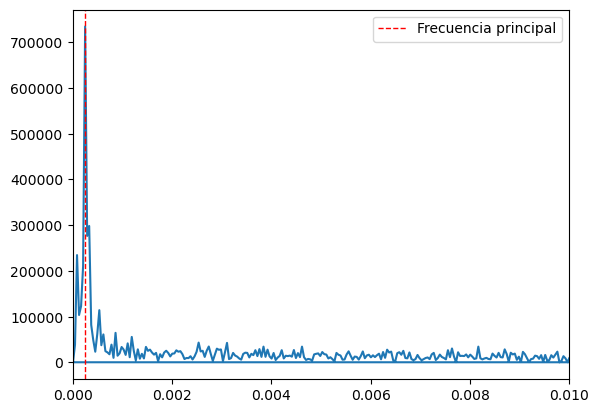

In [290]:
plt.plot(frecuencias,norma_transformada)
plt.xlim(0,0.01)
plt.axvline(f_p,color="r",linestyle="--",label="Frecuencia principal",lw=1)
plt.legend()

/var/folders/wc/q8bq4xy97n3_jwd21hpc51y80000gn/T/ipykernel_5396/2456994340.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(frecuencias),np.log10(norma_transformada))
/var/folders/wc/q8bq4xy97n3_jwd21hpc51y80000gn/T/ipykernel_5396/2456994340.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(frecuencias),np.log10(norma_transformada))


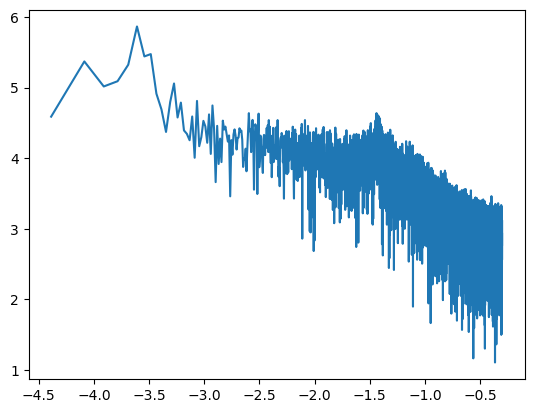

In [291]:
plt.plot(np.log10(frecuencias),np.log10(norma_transformada))

## PUNTO 2

In [312]:
def gauss(f,alpha):
    return np.exp(-(f*alpha))

In [308]:
def threshold(frecuencias,f_lim):
    filtro=np.zeros_like(frecuencias)
    for i,f in enumerate(frecuencias):
        if abs(f)<f_lim:
            filtro[i]=1
    return filtro

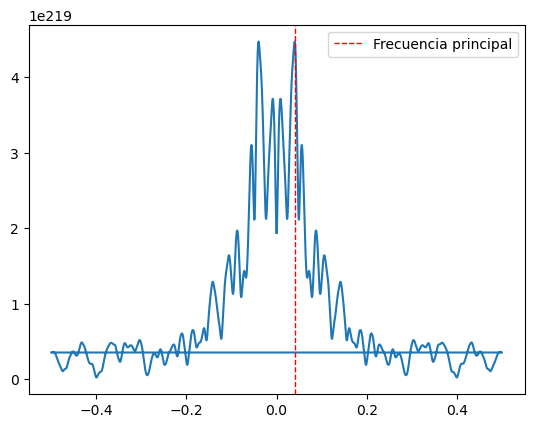

In [309]:
#####tipo Gauss
señal_filtrada=np.fft.fft(datos*gauss(frecuencias,1000))
norma_señal_filtrada=abs(señal_filtrada)
indice_max=np.argmax(norma_señal_filtrada[0:len(norma_señal_filtrada)//2])
f_p=frecuencias[indice_max]
plt.plot(frecuencias,norma_señal_filtrada)
plt.axvline(f_p,color="r",linestyle="--",label="Frecuencia principal",lw=1)
plt.legend()

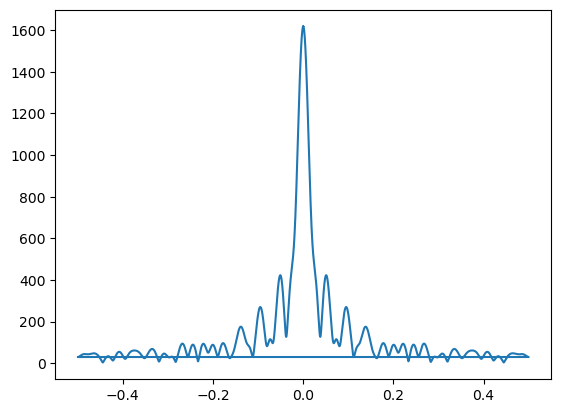

In [317]:
####tipo threshold
señal_filtrada=np.fft.fft(datos*threshold(frecuencias,0.001))
norma_señal_filtrada=abs(señal_filtrada)
indice_max=np.argmax(norma_señal_filtrada[0:len(norma_señal_filtrada)//2])
plt.plot(frecuencias,norma_señal_filtrada)

### PUNTO 1.2B

In [318]:
t=data.index.to_numpy()
inversa_original=np.fft.ifft(Transformada)
inversa_original+=media_datos
inversa_original=abs(inversa_original)
inversa_original

array([1.00000000e+01, 2.88713057e-14, 1.00000000e+00, ...,
       5.80000000e+01, 5.50000000e+01, 3.90000000e+01])

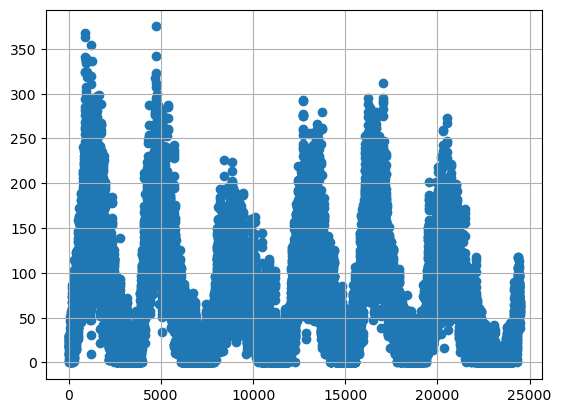

In [319]:
##Señal original
plt.scatter(t,inversa_original)
plt.grid()

In [320]:
inversa_filt=np.fft.ifft(señal_filtrada)
inversa_filt+=media_datos
inversa_filt=abs(inversa_filt)
inversa_filt

array([1.00000000e+01, 9.73795161e-16, 1.00000000e+00, ...,
       5.80000000e+01, 5.50000000e+01, 3.90000000e+01])

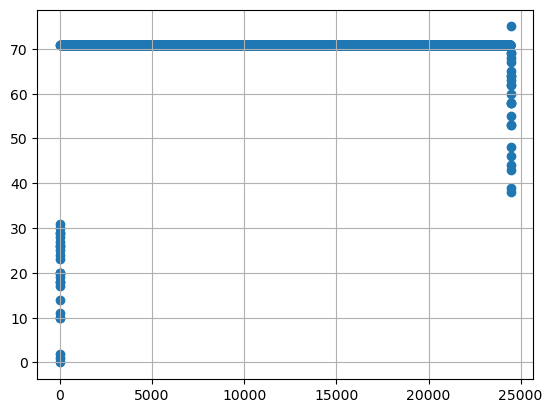

In [321]:
##Señal filtrada
plt.scatter(t,inversa_filt)
plt.grid()

## 1.3 EXTRAPOLACION

In [324]:
n=10
f_k=frecuencias[:n]
F_k=np.fft.fft(f_k,2*n)

# PUNTO 2

In [ ]:
from PIL import Image
img  = np.array(Image.open("image.jpg")).astype(float)